In [1]:
import pandas as pd

price_df = pd.read_csv(r"C:\Users\86183\Desktop\average_prices.csv")
senti_df = pd.read_csv(r"C:\Users\86183\Desktop\sh_senti.csv")

price_df['Date'] = pd.to_datetime(price_df['Date'])
senti_df['Date'] = pd.to_datetime(senti_df['Date'])
merged_df = pd.merge(price_df, senti_df, on='Date', how='inner')

print(merged_df)

         Date     Average      Price     Senti
0  2024-01-04  451.876667   0.000000  0.000000
1  2024-01-08  451.347778  -0.934444 -0.716723
2  2024-01-10  449.792222  -3.093778  0.000000
3  2024-01-17  449.420000   0.180000  0.000000
4  2024-01-22  446.248750  -0.292500  0.129903
5  2024-02-01  446.900000   0.380000 -0.242846
6  2024-02-19  479.555000  -1.060000  0.000000
7  2024-02-23  478.905000  -0.510000  0.593523
8  2024-02-29  480.955000   0.335000 -0.192342
9  2024-03-01  482.555000   1.600000  0.000000
10 2024-03-04  488.585000   6.030000 -0.249372
11 2024-03-05  494.585000   6.000000  0.000000
12 2024-03-06  498.520000   3.935000 -0.365795
13 2024-03-08  504.675000   1.355000  0.419560
14 2024-03-13  504.215000  -2.545000 -0.248876
15 2024-03-14  506.420000   2.205000  0.000000
16 2024-03-15  505.910000  -0.510000 -0.637684
17 2024-03-20  504.740000   0.175000  0.000000
18 2024-04-01  531.915000   5.015000 -0.172304
19 2024-04-03  538.735000   6.765000  0.247500
20 2024-04-08

In [2]:
correlation = merged_df['Senti'].corr(merged_df['Price'])
print(f"Correlation between senti and price: {correlation}")

Correlation between senti and price: 0.026034558830324416


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.03459
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.853
Time:                        01:57:37   Log-Likelihood:                -159.02
No. Observations:                  53   AIC:                             322.0
Df Residuals:                      51   BIC:                             326.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8057      0.689      1.169      0.2

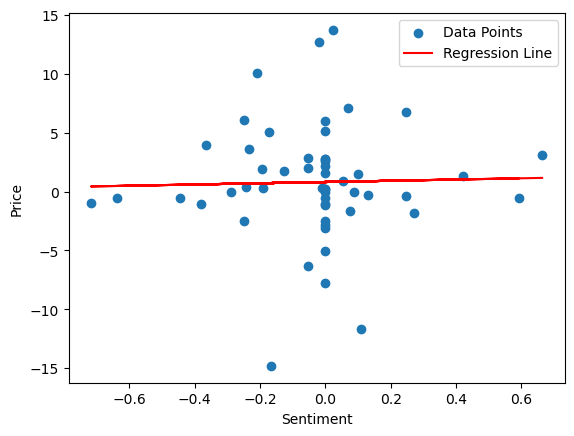

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
X = merged_df['Senti']
y = merged_df['Price']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())
plt.scatter(merged_df['Senti'], merged_df['Price'], label='Data Points')
plt.plot(merged_df['Senti'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.legend()